<a href="https://colab.research.google.com/github/OsbenVizcarra/Programacion_101/blob/main/4_simulated_annealing_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulated Annealing

# Plotting


Ejemplo de como visualizar los nodos

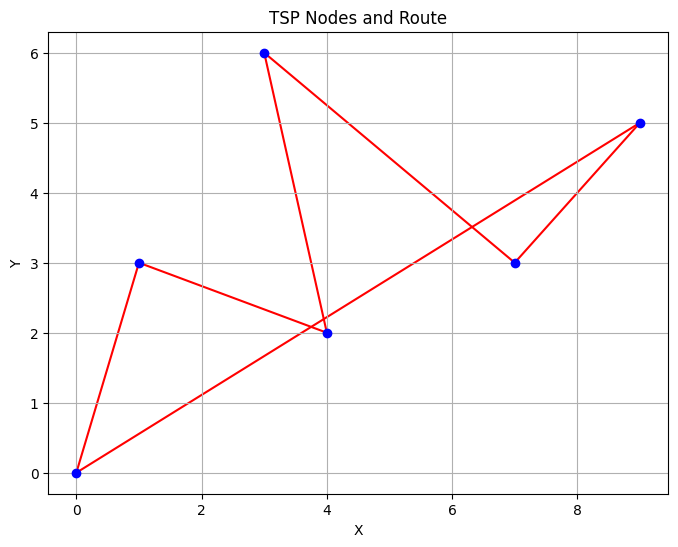

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

# Implementación

Generación de datos TSP y solución inicial

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
print(positions)
print(distances)


[[0.18916441 0.56269504]
 [0.47373536 0.03860182]
 [0.06131295 0.70534421]
 [0.56983328 0.617266  ]
 [0.03378975 0.8704579 ]
 [0.73849094 0.31998166]
 [0.49475929 0.88368889]
 [0.62554221 0.73178949]
 [0.76571571 0.54035241]
 [0.75336547 0.35971172]
 [0.03253101 0.09858725]
 [0.70020013 0.97783248]
 [0.67209186 0.13481321]
 [0.80075813 0.05042352]
 [0.30157777 0.35320934]
 [0.7800853  0.8245328 ]
 [0.28768349 0.68918699]
 [0.53908995 0.44825593]
 [0.97651068 0.97988714]
 [0.37423609 0.03815471]
 [0.12619655 0.70508033]
 [0.91213402 0.0632958 ]
 [0.07194351 0.35639135]
 [0.55279618 0.16721177]
 [0.08377643 0.47054811]
 [0.4902496  0.78623715]
 [0.63818704 0.78795794]
 [0.93523411 0.9333296 ]
 [0.24681946 0.33288883]
 [0.52166    0.78236662]
 [0.38506699 0.93951019]
 [0.64439509 0.03958467]
 [0.38664196 0.3220108 ]
 [0.76164472 0.56211551]
 [0.17313811 0.02446854]
 [0.17230145 0.06287942]
 [0.68519134 0.94388526]
 [0.86999242 0.03231007]
 [0.20849905 0.5810652 ]
 [0.05385432 0.61367531]


Algoritmo Simulated Annealing

In [ ]:
def fitness(sol):
  distance = 0
  for i in range(len(sol)-1):
    distance += distances[sol[i]][sol[i+1]]
  return distance

def random_neighbor(sol):
  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else: # damos la opcion de aceotar soluciones malas.
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
  T = T_max
  x = initial_solution.copy()
  E = fitness(x)

  print("temperatura:", T)
  print("x", x)
  print("E", E, "\n")


  while (T > T_min) :
    x_new = random_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate

  return x


[35 42 33 19 38  0 10 39 23 31 28  4  3  8 18 40 29 11 14  7 16 12  2  5
 41  6 15 13 21 49 48 26  9 43 17 27 24 36 22 45 46 34 37 25 44 20 30 32
  1 47]


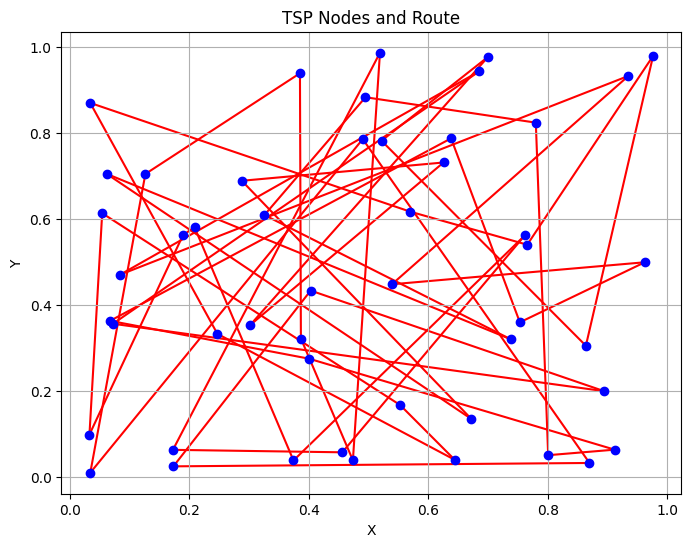

temperatura: 1000
x [35 42 33 19 38  0 10 39 23 31 28  4  3  8 18 40 29 11 14  7 16 12  2  5
 41  6 15 13 21 49 48 26  9 43 17 27 24 36 22 45 46 34 37 25 44 20 30 32
  1 47]
E 26.873965997365378 

[ 4 20  2 39 24 48 22 35 34 44 10 28 14 32 49 19 42  1 23 31 12  5  9  3
 17 46  0 38 41 16 25 29 26  7 33  8 40 13 37 21 45 43 15 36  6 30 47 11
 27 18]
7.036313653612117


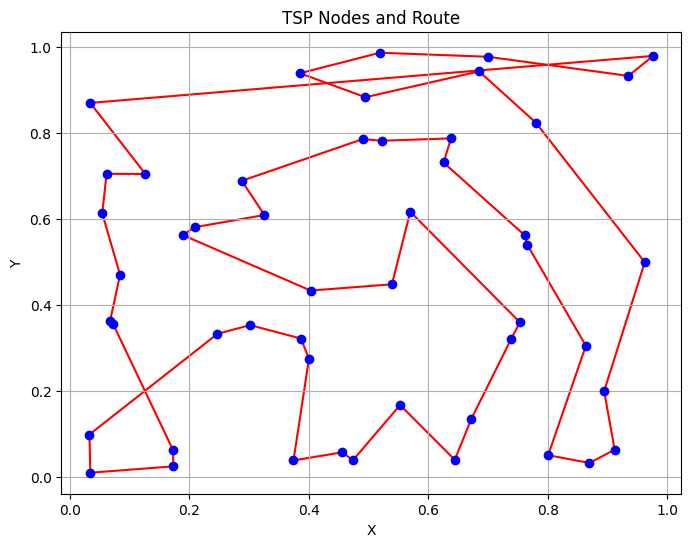

In [ ]:
T_max = 1000
T_min = 0.000001
#T_min = 0.1
cooling_rate = 0.9999


# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)
print(initial_solution)
plot_tsp(positions, initial_solution)

# best solution
sol = simulated_annealing(T_max, T_min, cooling_rate)
print(sol)
print(fitness(sol))
plot_tsp(positions, sol)

# Simulated Annealing vs Hill Climbing

Hill Climbing

In [ ]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol


temperatura: 1000
x [40 29 48 42 10  9 24 26 13 23 44  7  5 19 38 21  0 45 20 25 39 32 11 33
 34 43 12  8 28  6  1 31 15 36 41 17 27  4 46 16 47 35 37 14 30 18  2 49
 22  3]
E 26.801704860510867 

Hill Climbing distance 7.509059942382012
Simulated Annealing distance 6.693283440549006


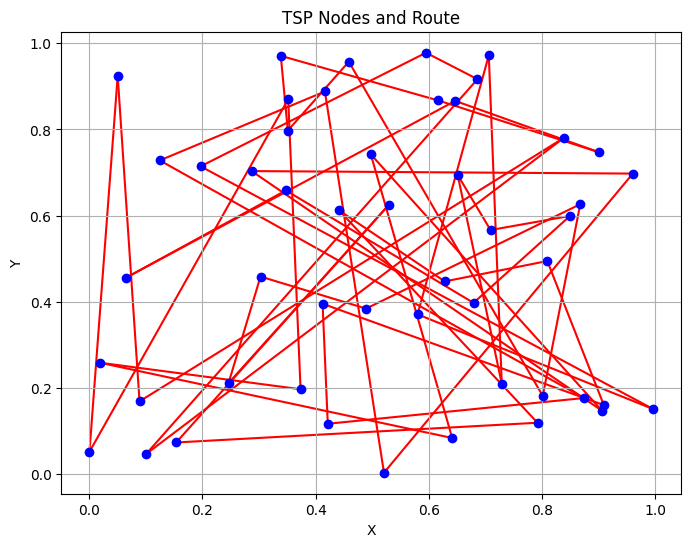

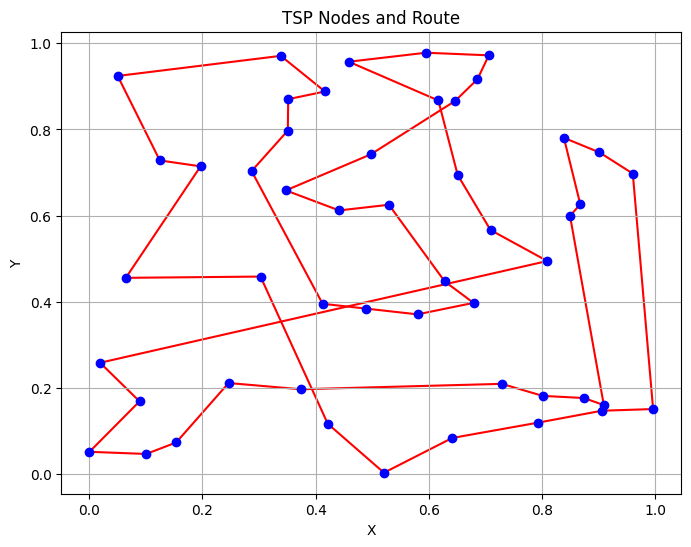

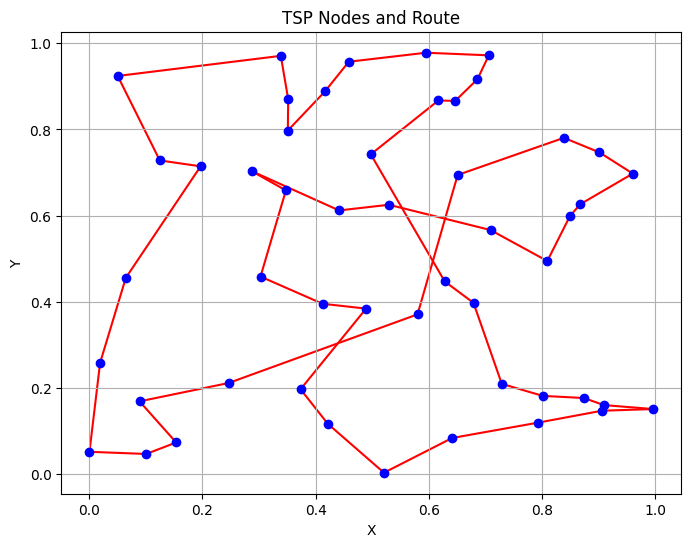

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))

# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

sol1 = hill_climbing(initial_solution)
sol2 = simulated_annealing(T_max, T_min, cooling_rate)

print("Hill Climbing distance", fitness(sol1))
print("Simulated Annealing distance", fitness(sol2))

plot_tsp(positions, initial_solution)
plot_tsp(positions, sol1)
plot_tsp(positions, sol2)